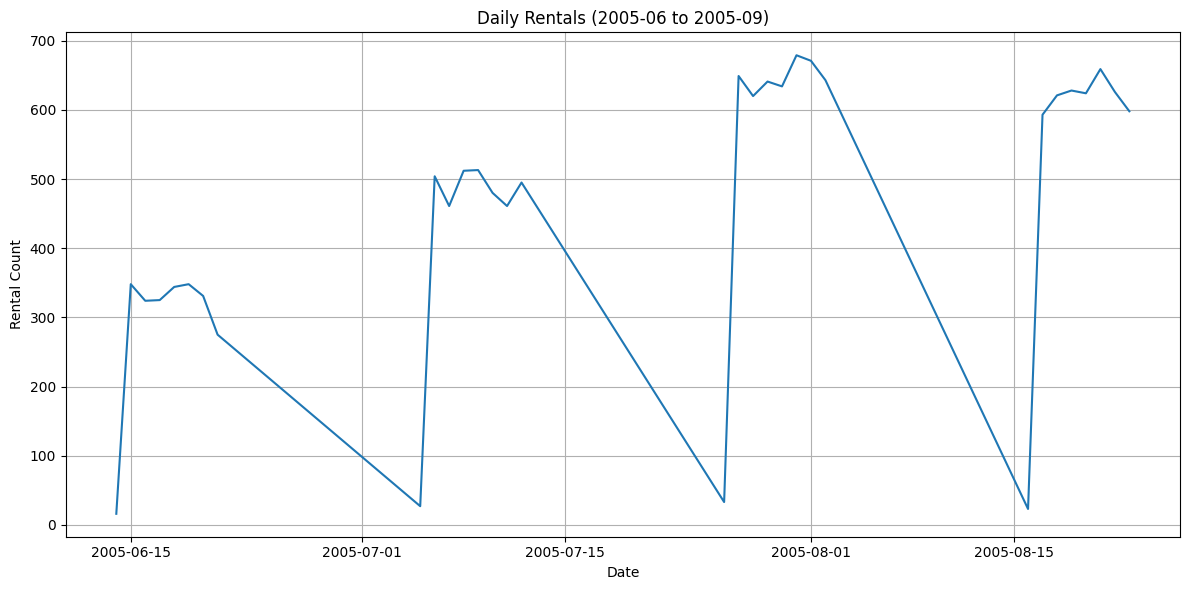

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

rental_csv = "csv_exports/rental.csv"

# 読み込み
df = pd.read_csv(rental_csv, parse_dates=["rental_date"])

# 日付だけの列（datetime64に揃える）
df["date"] = df["rental_date"].dt.floor("D")  # ← これで Timestamp のまま日単位

# 期間フィルタ：2005-06-01～2005-08-31
mask = (df["date"] >= "2005-06-01") & (df["date"] <= "2005-09-30")
df_filtered = df.loc[mask]

# 日次集計
daily = df_filtered.groupby("date").size().rename("rentals")

# プロット
plt.figure(figsize=(12, 6))
plt.plot(daily.index, daily.values, linewidth=1.5)
plt.title("Daily Rentals (2005-06 to 2005-09)")
plt.xlabel("Date")
plt.ylabel("Rental Count")
plt.grid(True)
plt.tight_layout()
plt.show()
